In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

## Dataset

In [78]:
# Dataclass for adding problem

class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [79]:
n_data = 2000
t_steps = 20

# data,labels = datagen_full_sum_normal(n_data,t_steps,normalize=True)
data,labels = datagen_circular(n_data,t_steps)
# data,labels = datagen_timewise_labels(n_data,t_steps,2)
# print(data[1],labels[1])

BATCH_SIZE = 64

training_data = Datamodel(data,labels)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)

data.shape

print(labels[99])

tensor([0.5314, 0.8915, 1.3457, 1.8939, 2.2887, 2.4701, 2.7900, 3.2008, 3.2621,
        3.4212, 3.7799, 3.9258, 4.0231, 4.1754, 4.5273, 4.7595, 5.0804, 5.5383,
        6.0135, 6.2832])


## Model training

100%|██████████| 300/300 [00:45<00:00,  6.57it/s]


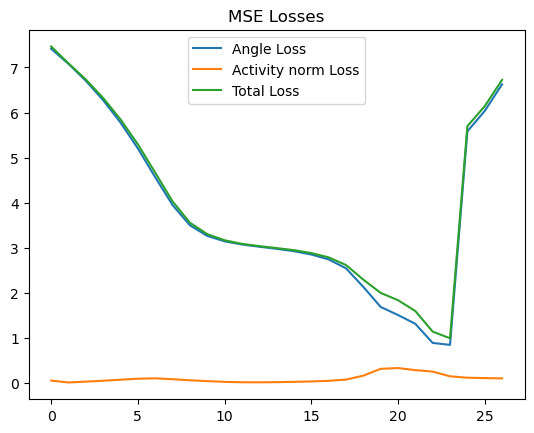

Guess on the first 15 training data:  tensor([[2.3741, 4.3766, 6.2490, 2.3492, 4.3456, 6.2145, 2.3264, 4.3158, 6.1812,
         2.3006, 4.2804, 6.1433, 2.2719, 4.2432, 6.1043, 2.2428, 4.2102, 6.0702,
         2.2145, 4.1745],
        [2.3695, 4.3727, 6.2449, 2.3475, 4.3438, 6.2118, 2.3184, 4.3049, 6.1707,
         2.2945, 4.2759, 6.1384, 2.2708, 4.2453, 6.1001, 2.2464, 4.2102, 6.0638,
         2.2199, 4.1784],
        [2.3751, 4.3776, 6.2496, 2.3563, 4.3524, 6.2197, 2.3249, 4.3128, 6.1771,
         2.2976, 4.2791, 6.1400, 2.2668, 4.2379, 6.1006, 2.2388, 4.2048, 6.0631,
         2.2094, 4.1671],
        [2.3722, 4.3756, 6.2463, 2.3464, 4.3368, 6.2046, 2.3202, 4.3058, 6.1717,
         2.2888, 4.2686, 6.1306, 2.2608, 4.2321, 6.0925, 2.2291, 4.1947, 6.0551,
         2.1999, 4.1590],
        [2.3739, 4.3752, 6.2474, 2.3469, 4.3418, 6.2087, 2.3185, 4.3045, 6.1686,
         2.2876, 4.2670, 6.1294, 2.2610, 4.2331, 6.0949, 2.2390, 4.2055, 6.0614,
         2.2076, 4.1660],
        [2.3727, 4.373

In [108]:
hidden_size = 2
input_size = 1
output_size = 1

train1 = True

if train1:
    # model2 = torch_RNN1(input_size,t_steps,output_size,hidden_size,lr=0.01,irnn=True,outputnn=False,Wx_normalize=True)
    # model1 = torch_RNN_full_manual(input_size,t_steps,output_size,hidden_size,lr=0.001,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # model1 = RNN_L2(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=1000,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # BIAS IS ON!
    model1 = RNN_circular(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=0.01,irnn=False,outputnn=False,Wx_normalize=False,activation=False,rotation_init=False,bias=True)
    # print("Guess on the first 15 training data: ", model1(data[0:15]))
    _ = model1.train(training_loader,epochs=300)
    model1.plot_losses(average=30)
    # model1.plot_accs()
    print("Guess on the first 15 training data: ", model1(data[0:15]))
    # print("Weight of the hidden layer: ",model2.rnn.weight_hh_l0, " Weight of the input layer: ",model2.rnn.weight_ih_l0)

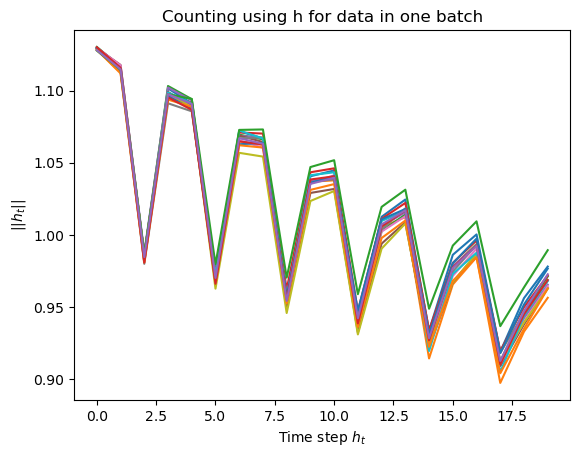

In [109]:
model1.hts.norm(dim=2).shape
htss = model1.hts.norm(dim=2)
plt.plot(htss.detach().numpy())
plt.title("Counting using h for data in one batch")
plt.xlabel(r"Time step $h_t$")
plt.ylabel(r"$||h_t||$")
plt.show()

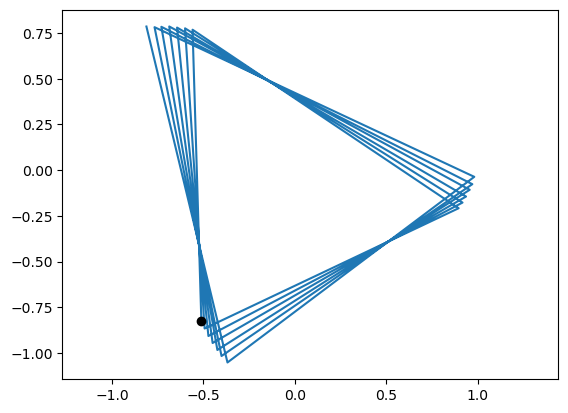

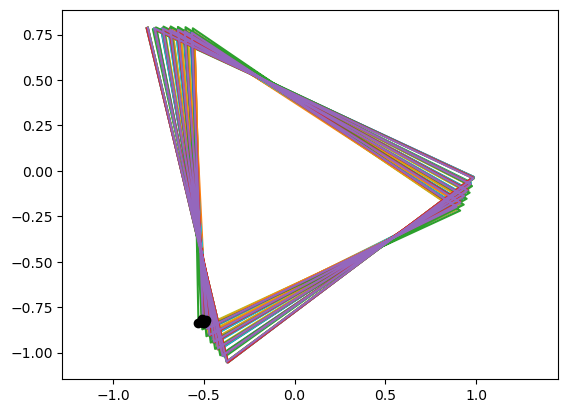

In [110]:
n = 3
model1.hts[:,n,:].shape
hts_cric = model1.hts.detach().numpy()
plt.plot(hts_cric[:,n,0],hts_cric[:,n,1],"-")
plt.plot(hts_cric[-1,n,0],hts_cric[-1,n,1],"o",color="black")
plt.axis("equal")
plt.show()
plt.plot(hts_cric[:,:,0],hts_cric[:,:,1],"-")
plt.plot(hts_cric[-1,:,0],hts_cric[-1,:,1],"o",color="black")
plt.axis("equal")
plt.show()

In [111]:
print(model1.input.weight)
print(model1.hidden.weight)
print(model1.output.weight)

Parameter containing:
tensor([[-0.0847],
        [-0.0446]], requires_grad=True)
Parameter containing:
tensor([[-0.6281, -0.8876],
        [ 0.8655, -0.3446]], requires_grad=True)
Parameter containing:
tensor([[ 0.4412, -0.3050]], requires_grad=True)


In [112]:
# hc = 0
# for h in model2.hts[0][0]:
#     hc += h

# np.linalg.norm(model2.hts[0,0].detach().numpy())
an1 = model1.hts[:,3,:]
an1 = an1.detach().numpy()
print(an1.shape)

for i in range(1,len(an1)):
    an1_i_normalized = an1[i]/np.linalg.norm(an1[i])
    an1_i_minus_1_normalized = an1[i-1]/np.linalg.norm(an1[i-1])
    # print(an1_i_normalized @ an1_i_minus_1_normalized)
    # Angle between an1[i] and an1[i-1]
    ang = np.arccos(an1_i_normalized @ an1_i_minus_1_normalized)
    print(np.rad2deg(ang))

(20, 2)
114.786674
107.180214
136.55333
114.03909
107.021255
137.43842
113.76291
106.91
137.52739
113.431786
106.68831
138.27803
112.943855
106.59325
138.64273
112.61996
106.59647
139.10887
112.25154


In [113]:
# SVD of the weight matrix Wh

Wh = model1.hidden.weight.detach().numpy()
U, s, Vh = np.linalg.svd(Wh)
print("Singular values of Wh: ",s)

np.prod(s)
np.linalg.det(Wh)

Singular values of Wh:  [1.1445837 0.8602312]


0.9846066

Norm av input: 0.7832165992968696
Norm av Wh-skalert input 0.8777677481122848 ratio: 1.12072158442543


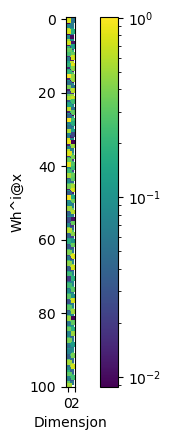

In [114]:
# Sjekker om Wh beholder normen til x 
x = np.random.uniform(size=hidden_size)
# x_const = np.ones((100,100))
x_const = np.random.uniform(size=(100,hidden_size))
print("Norm av input:", np.linalg.norm(x))
print("Norm av Wh-skalert input",np.linalg.norm(Wh @ x), "ratio:", np.linalg.norm(Wh @ x)/np.linalg.norm(x))
# Finner utviklingen av normen av Wh-skalert input
for i in range(1,100):
    Wx = model1.input.weight.detach().numpy()
    Wx_norm = np.linalg.norm(Wx)
    x_const[i] = np.linalg.matrix_power(Wh,i) @ x_const[i]
    # x_const[i] = np.linalg.matrix_power(Wh,i) @ Wx.squeeze()*x[i]
    # x_const[i] = Wx_norm**i* Wh**i @ x_const[i]
plt.imshow(x_const)
pcm = plt.pcolor(x_const, norm = "log")
plt.colorbar(pcm)
# plt.colorbar()
plt.xlabel("Dimensjon")
plt.ylabel("Wh^i@x")
plt.show()

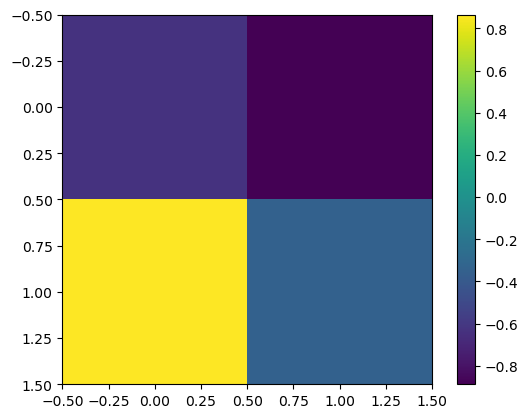

In [115]:
plt.imshow(Wh)
plt.colorbar()

In [116]:
Wx = model1.input.weight.detach().numpy()
print("Norm of Wx: ",np.linalg.norm(Wx))

Norm of Wx:  0.09572148
